In [1]:
%pylab inline
import random
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
df = pd.read_excel('data.xlsx', sheetname="Data")

In [3]:
df.shape

(4084, 41)

In [4]:
# 去頭去尾
df = df.iloc[50:-5:,:] 

In [5]:
df.shape

(4029, 41)

In [6]:
df.B1[df.B1 == 0] = 1 
df.B2[df.B2 == 0] = 1 
df.B3[df.B3 == 0] = 1 
df.C1[df.C1 == 0] = 1 
df.C2[df.C2 == 0] = 1 
df.C3[df.C3 == 0] = 1 
df.D4[df.D4 == 0] = 1 
df.D5[df.D5 == 0] = 1 
df.D6[df.D6 == 0] = 1 
df.D7[df.D7 == 0] = 1 
df.D8[df.D8 == 0] = 1 
df.D9[df.D9 == 0] = 1 
df.D10[df.D10 == 0] = 1 
df.D11[df.D11 == 0] = 1 
df.D12[df.D12 == 0] = 1 
df.D13[df.D13 == 0] = 1 
df.D14[df.D14 == 0] = 1 
df.D15[df.D15 == 0] = 1 
df.D16[df.D16 == 0] = 1 
df.D17[df.D17 == 0] = 1 
df.D18[df.D18 == 0] = 1 
df.D19[df.D19 == 0] = 1 

In [7]:
df.head()

,A0,A1,A2,A3,A4,A5,B0,B1,B2,B3,...,D15,D16,D17,D18,D19,D20,D21,D22,Y,Y002
50,2001-09-13,-25.9342,-8.6923,-126.0995,-126.0995,-128.883193,2001-09-13,-1,-1,-1,...,-1,-1,-1,1,-1,3862,-352,-9.114448,0,1
51,2001-09-14,-23.1736,-28.2595,-186.3750,-186.3750,-110.080700,2001-09-14,-1,-1,-1,...,-1,-1,-1,-1,1,3705,-275,-7.422402,0,1
52,2001-09-19,-43.7900,-30.6478,-232.9197,-232.9197,-113.004687,2001-09-19,-1,-1,-1,...,-1,-1,-1,-1,1,3737,-112,-2.997056,0,1
53,2001-09-20,-49.2397,-36.7817,-269.4316,-269.4316,-98.204920,2001-09-20,-1,-1,-1,...,-1,-1,-1,-1,-1,3551,9,0.253450,0,0
54,2001-09-21,-58.1960,-44.3840,-281.9937,-281.9937,-121.947560,2001-09-21,-1,-1,-1,...,-1,-1,-1,-1,1,3427,189,5.515028,1,2


## 訓練資料 and 測試資料

In [8]:
pd.value_counts(df['Y'].values, sort=False)
y = df['Y']

In [9]:
X = df.drop(['Y','Y002','A0','B0','C0','D0','D20','D21','D22'], 1)
X.head()

,A1,A2,A3,A4,A5,B1,B2,B3,B4,C1,...,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19
50,-25.9342,-8.6923,-126.0995,-126.0995,-128.883193,-1,-1,-1,44462,-1,...,-1,1,-1,-1,-1,-1,-1,-1,1,-1
51,-23.1736,-28.2595,-186.3750,-186.3750,-110.080700,-1,-1,-1,39845,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
52,-43.7900,-30.6478,-232.9197,-232.9197,-113.004687,-1,-1,-1,36702,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
53,-49.2397,-36.7817,-269.4316,-269.4316,-98.204920,-1,-1,-1,26122,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
54,-58.1960,-44.3840,-281.9937,-281.9937,-121.947560,-1,-1,-1,13168,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1


In [10]:
X.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3',
       'C4', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19'],
      dtype='object')

## 訓練資料 and 測試資料

In [11]:
X.shape

(4029, 32)

In [12]:
y.shape

(4029,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
X_train.shape

(3223, 32)

In [15]:
y_train.shape

(3223,)

## 尺度標準化

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[ 1.57520645, -0.78105927,  1.27146583, ...,  0.96733435,
         0.98003178,  0.96853691],
       [ 1.21801473,  0.25451848, -0.2530957 , ...,  0.96733435,
         0.98003178,  0.96853691],
       [ 0.60929179,  0.19057718,  0.1807903 , ...,  0.96733435,
        -1.02037508, -1.03248518],
       ..., 
       [ 1.01242681,  1.26238433,  0.95004353, ...,  0.96733435,
        -1.02037508, -1.03248518],
       [ 0.31974615, -0.75995433,  0.19578981, ..., -1.03376873,
        -1.02037508,  0.96853691],
       [-0.21136057,  0.31275104,  0.5432438 , ..., -1.03376873,
        -1.02037508, -1.03248518]])

In [17]:
X_test = sc.fit_transform(X_test)
X_test

array([[ -8.65026326e-01,  -8.76814376e-02,  -1.07893863e+00, ...,
         -9.92583334e-01,  -1.04831214e+00,  -1.00747208e+00],
       [  6.18383501e-01,  -8.97247678e-01,   1.44981631e+00, ...,
          1.00747208e+00,   9.53914360e-01,   9.92583334e-01],
       [ -1.03168524e+00,   3.61346946e+00,  -1.12630162e+00, ...,
          1.00747208e+00,   9.53914360e-01,  -1.00747208e+00],
       ..., 
       [ -1.84219020e+00,  -5.75819668e-01,   1.66959316e-01, ...,
         -9.92583334e-01,  -1.04831214e+00,  -1.00747208e+00],
       [ -3.13001239e-01,   1.44573262e+00,  -2.15849832e+00, ...,
         -9.92583334e-01,  -1.04831214e+00,  -1.00747208e+00],
       [ -1.53748302e-02,  -3.03903324e-01,   2.50027577e-03, ...,
          1.00747208e+00,   9.53914360e-01,   9.92583334e-01]])

## 訓練ANN

In [18]:
X_train.shape

(3223, 32)

In [19]:
model = Sequential()

model.add(Dense(units = 28, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
model.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 28))
model.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 20))
model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                924       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                696       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 36        
__________

In [21]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
train_history = model.fit(X_train, y_train, batch_size = 10, epochs = 250, validation_split=0.2)

Train on 2578 samples, validate on 645 samples
Epoch 1/250
2578/2578 [==============================] - 1s - loss: 0.6921 - acc: 0.5372 - val_loss: 0.6894 - val_acc: 0.5736
Epoch 2/250
2578/2578 [==============================] - 0s - loss: 0.6907 - acc: 0.5427 - val_loss: 0.6873 - val_acc: 0.5736
Epoch 3/250
2578/2578 [==============================] - 0s - loss: 0.6900 - acc: 0.5427 - val_loss: 0.6861 - val_acc: 0.5736
Epoch 4/250
2578/2578 [==============================] - 0s - loss: 0.6897 - acc: 0.5427 - val_loss: 0.6853 - val_acc: 0.5736
Epoch 5/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6849 - val_acc: 0.5736
Epoch 6/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6847 - val_acc: 0.5736
Epoch 7/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6846 - val_acc: 0.5736
Epoch 8/250
2578/2578 [==============================] - 0s - loss: 0.6

2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_acc: 0.5736
Epoch 66/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_acc: 0.5736
Epoch 67/250
2578/2578 [==============================] - 1s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 68/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 69/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 70/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 71/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 72/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.57

2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 130/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_acc: 0.5736
Epoch 131/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6845 - val_acc: 0.5736
Epoch 132/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6843 - val_acc: 0.5736
Epoch 133/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_acc: 0.5736
Epoch 134/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6843 - val_acc: 0.5736
Epoch 135/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6843 - val_acc: 0.5736
Epoch 136/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_ac

2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 194/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_acc: 0.5736
Epoch 195/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_acc: 0.5736
Epoch 196/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_acc: 0.5736
Epoch 197/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_acc: 0.5736
Epoch 198/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 199/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6841 - val_acc: 0.5736
Epoch 200/250
2578/2578 [==============================] - 0s - loss: 0.6896 - acc: 0.5427 - val_loss: 0.6842 - val_ac

## 顯示訓練過程

In [22]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

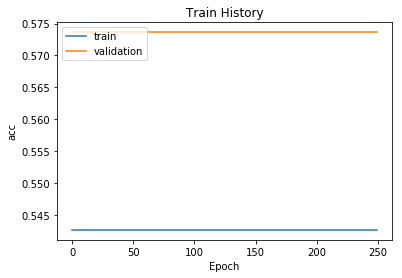

In [23]:
show_train_history(train_history,'acc','val_acc')

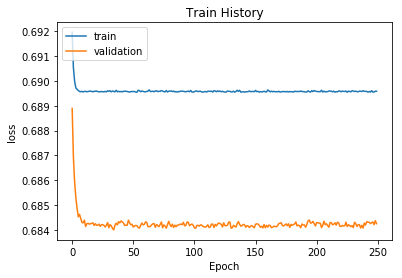

In [24]:
show_train_history(train_history,'loss','val_loss')

## 評估模型準確率

In [25]:
socres = model.evaluate(X_test, y_test)

 32/806 [>.............................] - ETA: 0s

In [26]:
print('accuracy=',socres[1])

accuracy= 0.502481389578


## 預測

In [27]:
prediction = model.predict_classes(X_test)

 32/806 [>.............................] - ETA: 0s

In [28]:
prediction.shape

(806, 1)

In [29]:
confusion_matrix(y_test, prediction)

array([[405,   0],
       [401,   0]])

## 繪製ANN 的 ROC Curve

In [30]:
y_pred = model.predict(X_test)
predicted = (y_pred > 0.5).flatten().astype(int)

In [31]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [32]:
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

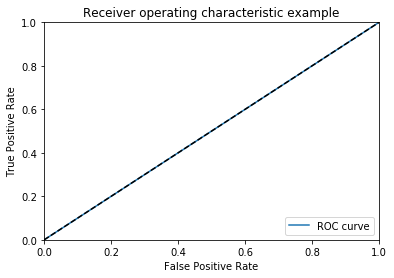

In [33]:
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 比較不同分類器準確度

In [34]:
# ANN
model

In [35]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(X_train, y_train)

clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

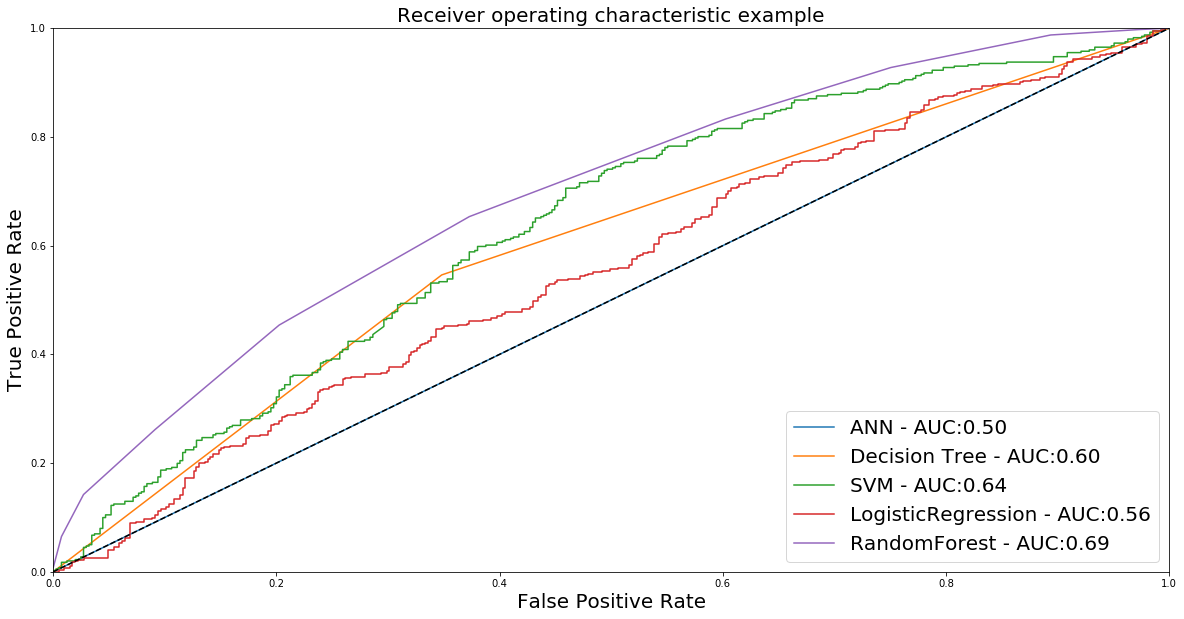

In [36]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])
for clf, title in zip([model,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## End